In [15]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

training_df = pd.read_csv("/content/Salary.csv" )
training_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
def build_model(my_l
earning_rate):
  """Create and compile a simple linear regression model."""

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))


  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):


  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)


  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]


  epochs = history.epoch


  hist = pd.DataFrame(history.history)


  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



Defined the build_model and train_model functions.


In [18]:
def plot_the_model(trained_weight, trained_bias, feature, label):



  plt.xlabel(feature)
  plt.ylabel(label)

  random_examples = training_df.sample(n=30)
  plt.scatter(random_examples[feature], random_examples[label])


  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')


  plt.show()


def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()



Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/3
4/4 [==============================] - 0s 4ms/step - loss: 8052958720.0000 - root_mean_squared_error: 89738.2812
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 8052851200.0000 - root_mean_squared_error: 89737.6797
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 8052774400.0000 - root_mean_squared_error: 89737.2500

The learned weight for your model is -0.7921
The learned bias for your model is 0.1975



/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


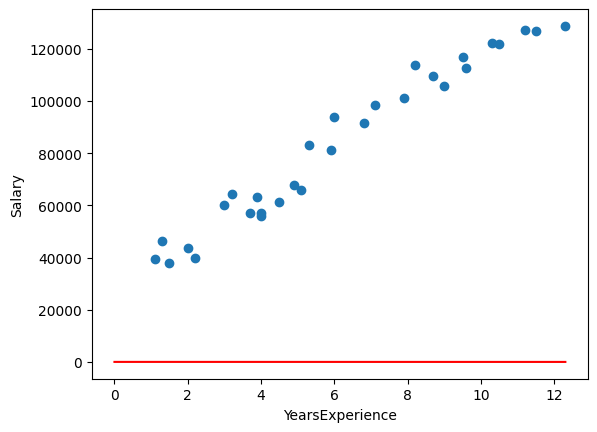

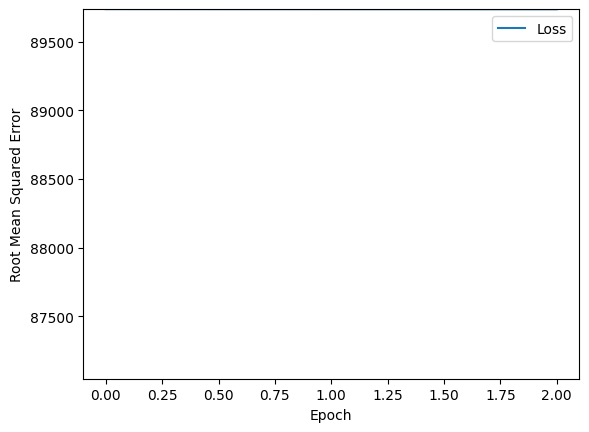

In [19]:
learning_rate = 0.01
epochs = 3
batch_size = 10


my_feature = "YearsExperience"
my_label="Salary"


my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [22]:
def predict_salary(n, feature, label):


  batch = training_df[feature][10:10 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10 + i],
                                   training_df[label][10 + i],
                                   predicted_values[i][0] ))

In [23]:
predict_salary(7, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    4  63218              -3
    4  55794              -3
    4  56957              -3
    4  57081              -3
    4  61111              -3
    5  67938              -4
    5  66029              -4
